In [166]:
import requests
from bs4 import BeautifulSoup
import time
import json
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

####   リンクをインバウンド用とアウトバウンド用のリンク

In [74]:
url = 'https://www.tourism.jp/tourism-database/stats/inbound/'
url_out = 'https://www.tourism.jp/tourism-database/stats/outbound/'

##  インバウンド

In [58]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# 表を見つける
table = soup.find('table')  # 最初の<table>が出る

tr_list = table.find_all('tr')

for tr in tr_list:
    print(tr.text)

    time.sleep(1) 


国・地域名
月別訪日客数
2024年11月
対前年同月比


韓国

749,500人



中国

546,300人



台湾

488,400人



香港

227,100人



タイ

118,000人



シンガポール

95,800人



マレーシア

62,000人



インドネシア

48,800人



フィリピン

87,100人



ベトナム

50,200人



インド

23,500人



英国

37,000人



フランス

31,100人



ドイツ

25,200人



イタリア

20,800人



ロシア

13,900人



スペイン

18,800人



USA

247,500人



カナダ

47,300人



オーストラリア

80,300人




In [94]:
# データ格納用リスト
data = []  

for tr in tr_list:
    cols = tr.find_all(['th', 'td'])  
    col_text = [col.text.strip() for col in cols]  #テキスト抽出
    
    if len(col_text) >= 2:  # データが2列以上ある場合のみ処理
        country = col_text[0]  # 国名
        visitors = col_text[2]  # 訪問者数
        data.append(('インバウンド' ,country, visitors))  # リストに追加
    

    
print("データ内容:")
for d in data:
    print(f"{d},")

データ内容:
('インバウンド', '国・地域名', '2024年11月'),
('インバウンド', '韓国', '749,500人'),
('インバウンド', '中国', '546,300人'),
('インバウンド', '台湾', '488,400人'),
('インバウンド', '香港', '227,100人'),
('インバウンド', 'タイ', '118,000人'),
('インバウンド', 'シンガポール', '95,800人'),
('インバウンド', 'マレーシア', '62,000人'),
('インバウンド', 'インドネシア', '48,800人'),
('インバウンド', 'フィリピン', '87,100人'),
('インバウンド', 'ベトナム', '50,200人'),
('インバウンド', 'インド', '23,500人'),
('インバウンド', '英国', '37,000人'),
('インバウンド', 'フランス', '31,100人'),
('インバウンド', 'ドイツ', '25,200人'),
('インバウンド', 'イタリア', '20,800人'),
('インバウンド', 'ロシア', '13,900人'),
('インバウンド', 'スペイン', '18,800人'),
('インバウンド', 'USA', '247,500人'),
('インバウンド', 'カナダ', '47,300人'),
('インバウンド', 'オーストラリア', '80,300人'),


##  アウトバウンド

In [80]:
response2 = requests.get(url_out)
soup2 = BeautifulSoup(response2.content, 'html.parser')

# 表を見つける
table2 = soup2.find('table')  # 最初の<table>が出る

tr_list2 = table2.find_all('tr')

for tr2 in tr_list2:
    print(tr2.text)

    time.sleep(1) 


国・地域名
月別入国数
2024年11月
対前年同月比


韓国

341,198人



台湾





香港

54,389人



マカオ

11,719人



タイ

109,639人



マレーシア

23,498人



シンガポール

44,330人



フィリピン

30,717人



バリ/インドネシア





ベトナム

71,014人



カナダ





アメリカ

141,389人



ハワイ/アメリカ

60,683人



グアム





オーストラリア





ニュージーランド





ドイツ





スペイン

61,593泊



オーストリア






In [95]:
# データ格納用リスト
data2 = []  

for tr2 in tr_list2:
    cols2 = tr2.find_all(['th', 'td'])  
    col_text2 = [col2.text.strip() for col2 in cols2]  #テキスト抽出
    
    if len(col_text2) >= 2:  # データが2列以上ある場合のみ処理
        country2 = col_text2[0]  # 国名
        visitors2 = col_text2[2]  # 訪問者数
        data2.append(('アウトバウンド',country2, visitors2))  # リストに追加
    
    

print("データ内容:")
for d2 in data2:
    print(f"{d2},")

データ内容:
('アウトバウンド', '国・地域名', '2024年11月'),
('アウトバウンド', '韓国', '341,198人'),
('アウトバウンド', '台湾', ''),
('アウトバウンド', '香港', '54,389人'),
('アウトバウンド', 'マカオ', '11,719人'),
('アウトバウンド', 'タイ', '109,639人'),
('アウトバウンド', 'マレーシア', '23,498人'),
('アウトバウンド', 'シンガポール', '44,330人'),
('アウトバウンド', 'フィリピン', '30,717人'),
('アウトバウンド', 'バリ/インドネシア', ''),
('アウトバウンド', 'ベトナム', '71,014人'),
('アウトバウンド', 'カナダ', ''),
('アウトバウンド', 'アメリカ', '141,389人'),
('アウトバウンド', 'ハワイ/アメリカ', '60,683人'),
('アウトバウンド', 'グアム', ''),
('アウトバウンド', 'オーストラリア', ''),
('アウトバウンド', 'ニュージーランド', ''),
('アウトバウンド', 'ドイツ', ''),
('アウトバウンド', 'スペイン', '61,593泊'),
('アウトバウンド', 'オーストリア', ''),


##  データベースに格納

In [76]:
!pwd

/Users/dangararara/muds/b1/DSprog2/2_work


In [159]:
path = '/Users/dangararara/muds/b1/DSprog2/2_work/'

db_name = 'final_pj.db'

con = sqlite3.connect(path + db_name)

con.close()

In [160]:
con = sqlite3.connect(path + db_name)

cur = con.cursor()

sql = 'CREATE TABLE finalPJJJ (type text, country_name text, visitors int);'

cur.execute(sql)

con.close()

In [161]:
con = sqlite3.connect(path + db_name)

cur = con.cursor()

sql_insert_many = "INSERT INTO finalPJJJ VALUES (?, ?, ?);"

final_pj =[
('インバウンド', '韓国', '749500'),
('インバウンド', '中国', '546300'),
('インバウンド', '台湾', '488400'),
('インバウンド', '香港', '227100'),
('インバウンド', 'タイ', '118000'),
('インバウンド', 'シンガポール', '95800'),
('インバウンド', 'マレーシア', '62000'),
('インバウンド', 'インドネシア', '48800'),
('インバウンド', 'フィリピン', '87100'),
('インバウンド', 'ベトナム', '50200'),
('インバウンド', 'インド', '23500'),
('インバウンド', '英国', '37000'),
('インバウンド', 'フランス', '31100'),
('インバウンド', 'ドイツ', '25200'),
('インバウンド', 'イタリア', '20800'),
('インバウンド', 'ロシア', '13900'),
('インバウンド', 'スペイン', '18800'),
('インバウンド', 'USA', '247500'),
('インバウンド', 'カナダ', '47300'),
('インバウンド', 'オーストラリア', '80300'),
('アウトバウンド', '韓国', '341198'),
('アウトバウンド', '台湾', ''),
('アウトバウンド', '香港', '54389'),
('アウトバウンド', 'マカオ', '11719'),
('アウトバウンド', 'タイ', '109639'),
('アウトバウンド', 'マレーシア', '23498'),
('アウトバウンド', 'シンガポール', '44330'),
('アウトバウンド', 'フィリピン', '30717'),
('アウトバウンド', 'バリ/インドネシア', ''),
('アウトバウンド', 'ベトナム', '71014'),
('アウトバウンド', 'カナダ', ''),
('アウトバウンド', 'アメリカ', '141389'),
('アウトバウンド', 'ハワイ/アメリカ', '60683'),
('アウトバウンド', 'グアム', ''),
('アウトバウンド', 'オーストラリア', ''),
('アウトバウンド', 'ニュージーランド', ''),
('アウトバウンド', 'ドイツ', ''),
('アウトバウンド', 'スペイン', '61593'),
('アウトバウンド', 'オーストリア', '')
]

cur.executemany(sql_insert_many, final_pj)

con.commit()

con.close()

###  入力に応じて出力を動的に変化させられるようにすること

In [176]:
def get_statistics(db_name, visitor_type=None):
    
    conn = sqlite3.connect(db_name)
    
    query = "SELECT * FROM finalPJJJ"
    params = []

    if visitor_type:
        query += " WHERE type = ?"
        params.append(visitor_type)

    #データ取得
    df = pd.read_sql_query(query, conn, params=params)
    conn.close()

    return df

db_name = 'final_pj.db'

#インバウンドデータを取得
inbound_data = get_statistics(db_name, visitor_type='インバウンド')
print(inbound_data)

#アウトバウンドデータを取得
outbound_data = get_statistics(db_name, visitor_type='アウトバウンド')
print(outbound_data)

      type country_name  visitors
0   インバウンド           韓国    749500
1   インバウンド           中国    546300
2   インバウンド           台湾    488400
3   インバウンド           香港    227100
4   インバウンド           タイ    118000
5   インバウンド       シンガポール     95800
6   インバウンド        マレーシア     62000
7   インバウンド       インドネシア     48800
8   インバウンド        フィリピン     87100
9   インバウンド         ベトナム     50200
10  インバウンド          インド     23500
11  インバウンド           英国     37000
12  インバウンド         フランス     31100
13  インバウンド          ドイツ     25200
14  インバウンド         イタリア     20800
15  インバウンド          ロシア     13900
16  インバウンド         スペイン     18800
17  インバウンド          USA    247500
18  インバウンド          カナダ     47300
19  インバウンド      オーストラリア     80300
       type country_name visitors
0   アウトバウンド           韓国   341198
1   アウトバウンド           台湾         
2   アウトバウンド           香港    54389
3   アウトバウンド          マカオ    11719
4   アウトバウンド           タイ   109639
5   アウトバウンド        マレーシア    23498
6   アウトバウンド       シンガポール    44330
7   アウトバウンド   

##  データ可視化


In [206]:
# インバウンドデータを取得
inbound_data = get_statistics(db_name, visitor_type='インバウンド')

# アウトバウンドデータを取得
outbound_data = get_statistics(db_name, visitor_type='アウトバウンド')



In [207]:
# visitors列を数値型に変換する前に空白や特殊文字をNaNに置き換える
outbound_data['visitors'] = outbound_data['visitors'].replace(['', ' ', 'N/A'], None)

# 再度欠損値を0で埋める
outbound_data['visitors'] = outbound_data['visitors'].fillna(0).astype(int)

print(outbound_data.head())  # データフレームの先頭を表示

      type country_name  visitors
0  アウトバウンド           韓国    341198
1  アウトバウンド           台湾         0
2  アウトバウンド           香港     54389
3  アウトバウンド          マカオ     11719
4  アウトバウンド           タイ    109639


/var/folders/yq/07xv76g17js78kv_yy33kk440000gn/T/ipykernel_22850/820124895.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outbound_data['visitors'] = outbound_data['visitors'].fillna(0).astype(int)


In [208]:
# データの整形
inbound_data = inbound_data[['country_name', 'visitors']].set_index('country_name')
outbound_data = outbound_data[['country_name', 'visitors']].set_index('country_name')

# インバウンドとアウトバウンドのデータを統合
merged_data = inbound_data.join(outbound_data, how='outer', lsuffix='_inbound', rsuffix='_outbound').fillna(0)

# データを確認
print(merged_data)

              visitors_inbound  visitors_outbound
country_name                                     
USA                   247500.0                0.0
アメリカ                       0.0           141389.0
イタリア                   20800.0                0.0
インド                    23500.0                0.0
インドネシア                 48800.0                0.0
オーストラリア                80300.0                0.0
オーストリア                     0.0                0.0
カナダ                    47300.0                0.0
グアム                        0.0                0.0
シンガポール                 95800.0            44330.0
スペイン                   18800.0            61593.0
タイ                    118000.0           109639.0
ドイツ                    25200.0                0.0
ニュージーランド                   0.0                0.0
ハワイ/アメリカ                   0.0            60683.0
バリ/インドネシア                  0.0                0.0
フィリピン                  87100.0            30717.0
フランス                   31100.0                0.0


インバウンドとアウトバウンドで書かれていた国が違っていたため、欠損値の処理等に困った


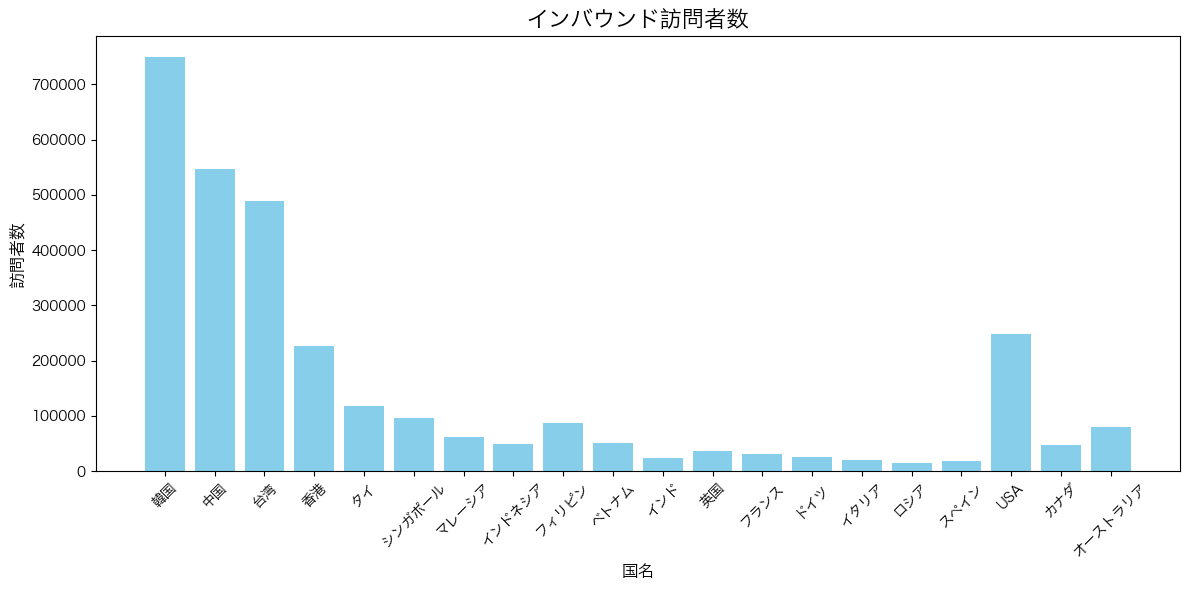

In [266]:
# インバウンドデータの棒グラフ
plt.figure(figsize=(12, 6))
plt.bar(inbound_data.index, inbound_data['visitors'], color='skyblue')  # indexを利用
plt.title('インバウンド訪問者数', fontsize=16)
plt.xlabel('国名', fontsize=12)
plt.ylabel('訪問者数', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()  # レイアウト調整
plt.show()

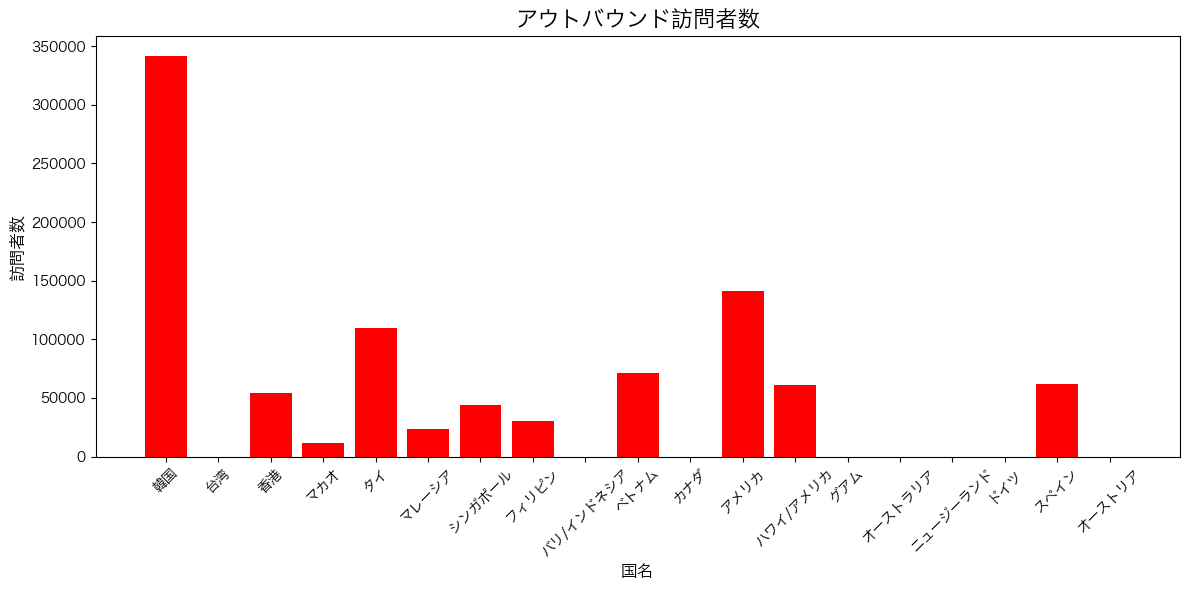

In [255]:
# アウトバウンドデータの棒グラフ
plt.figure(figsize=(12, 6))
plt.bar(outbound_data.index, outbound_data['visitors'], color='red')  # indexを利用
plt.title('アウトバウンド訪問者数', fontsize=16)
plt.xlabel('国名', fontsize=12)
plt.ylabel('訪問者数', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()  # レイアウト調整
plt.show()

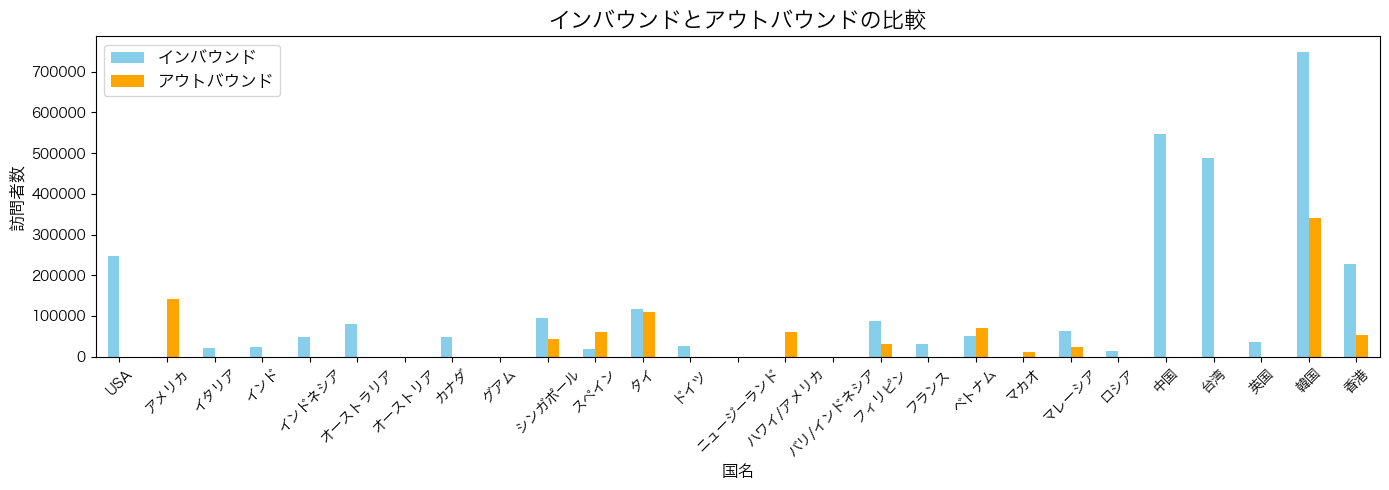

In [264]:
# 横並びの棒グラフ作成
merged_data[['visitors_inbound', 'visitors_outbound']].plot(
    kind='bar', figsize=(14, 5), color=['skyblue', 'orange']
)
plt.title('インバウンドとアウトバウンドの比較', fontsize=16)
plt.xlabel('国名', fontsize=12)
plt.ylabel('訪問者数', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['インバウンド', 'アウトバウンド'], fontsize=12)
plt.tight_layout()
plt.show()

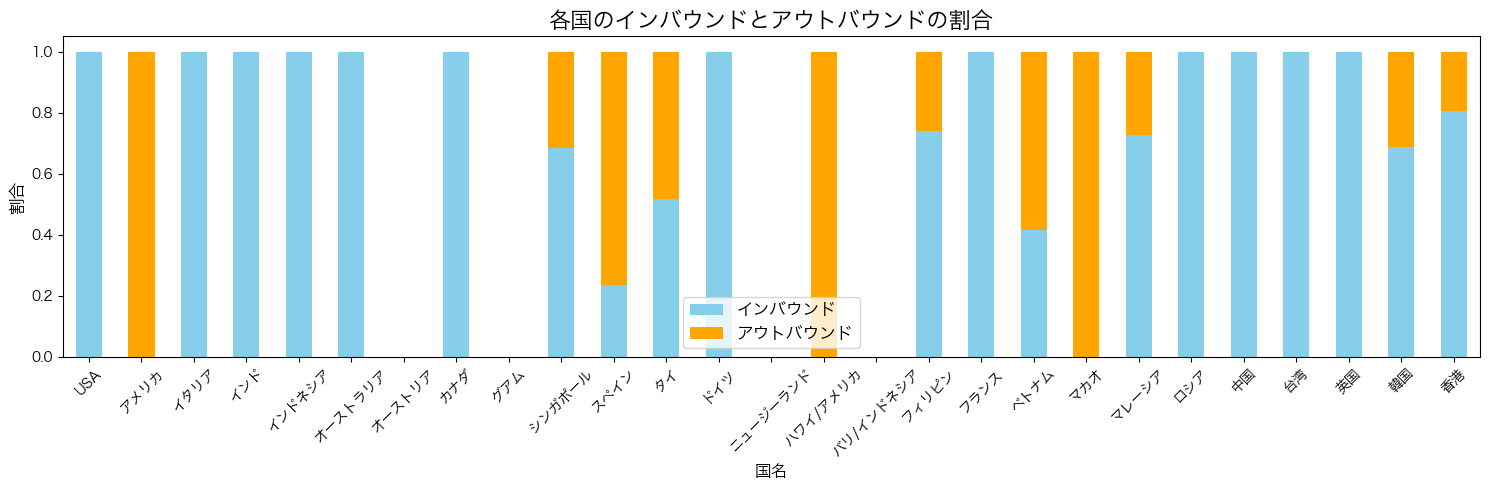

In [265]:
# 割合計算
merged_data['inbound_ratio'] = merged_data['visitors_inbound'] / (merged_data['visitors_inbound'] + merged_data['visitors_outbound'])
merged_data['outbound_ratio'] = 1 - merged_data['inbound_ratio']

# 割合の棒グラフ（積み上げ）
merged_data[['inbound_ratio', 'outbound_ratio']].plot(
    kind='bar', stacked=True, figsize=(15, 5), color=['skyblue', 'orange']
)
plt.title('各国のインバウンドとアウトバウンドの割合', fontsize=16)
plt.xlabel('国名', fontsize=12)
plt.ylabel('割合', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['インバウンド', 'アウトバウンド'], fontsize=12)
plt.tight_layout()
plt.show()